In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janatahack-av-computervision/test_vc2kHdQ.csv
/kaggle/input/janatahack-av-computervision/sample_submission_yxjOnvz.csv
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/train.csv
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/958.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1684.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1153.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1266.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/2301.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/734.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1947.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/2346.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/2197.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/2334.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1388.jpg

/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/357.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1306.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/2025.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1732.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1937.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/262.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1178.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/707.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1760.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/421.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/520.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/1950.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/images/978.jpg
/kaggle/input/janatahack-av-computervision/train_SOaYf6m/

In [127]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

from pathlib import Path
import os
import cv2
import glob
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import torch
import torchvision.transforms.functional as F

In [128]:
## set the data folder
data_folder = Path("../input/janatahack-av-computervision")
data_path = "../input/janatahack-av-computervision/train_SOaYf6m/images/"

path = os.path.join(data_path , "*jpg")

In [129]:
files = glob.glob(path)
data=[]
for file in files:
    image = cv2.imread(file)
    data.append(image)

In [130]:
## read the csv data files
train_df = pd.read_csv('../input/janatahack-av-computervision/train_SOaYf6m/train.csv')
test_df = pd.read_csv('../input/janatahack-av-computervision/test_vc2kHdQ.csv')
submit = pd.read_csv('../input/janatahack-av-computervision/sample_submission_yxjOnvz.csv')

In [131]:
train_df.shape, test_df.shape

((1646, 2), (706, 1))

In [132]:
train_df.groupby('emergency_or_not').count()

,image_names
emergency_or_not,
0,965
1,681


In [133]:
train_df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


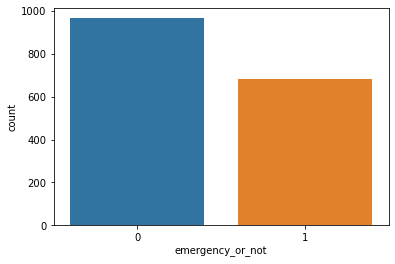

In [134]:
sns.countplot(x='emergency_or_not' , data=train_df)

In [135]:
train_images = data[:1646]
test_images= data[1646:]

In [136]:
train_images[0].shape

(224, 224, 3)

In [137]:
train_images[100].shape

(224, 224, 3)

In [138]:
def plot_class(cat):
    print(cat)
    fetch = train_df.loc[train_df['emergency_or_not']== cat][:3]
    print(fetch)
    fig = plt.figure(figsize=(20,15))
    
    for i , index in enumerate(fetch.index ,1):
        plt.subplot(1,3 ,i)
        plt.imshow(train_images[index])
        plt.xlabel(str(cat) + " (Index:" +str(index)+")" )
    plt.show()

1
   image_names  emergency_or_not
5       45.jpg                 1
8      294.jpg                 1
10     588.jpg                 1


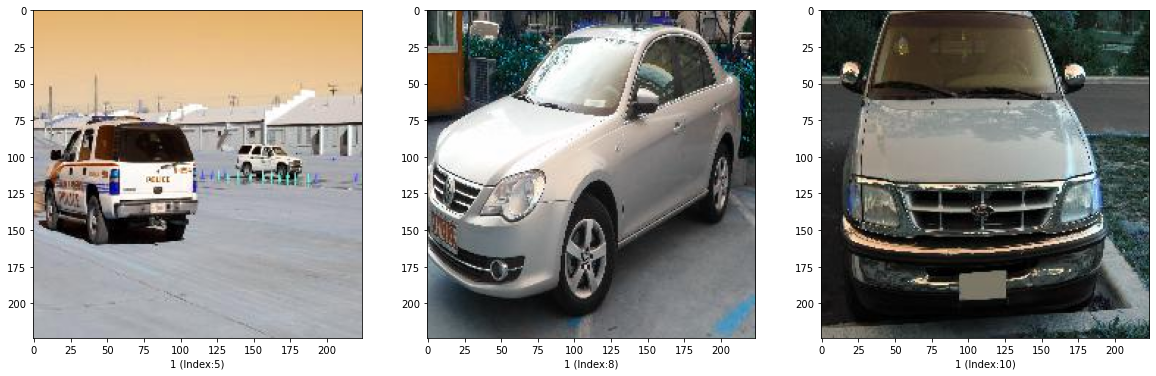

In [139]:
plot_class(1)

0
  image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0


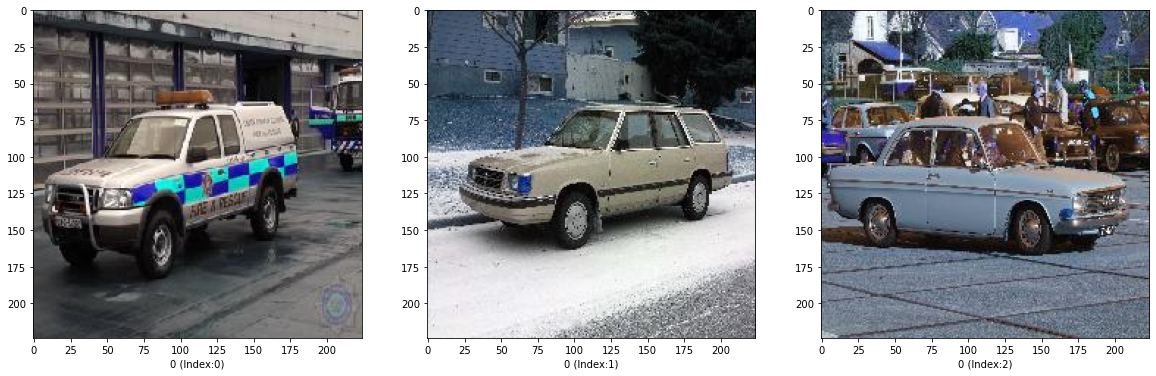

In [140]:
plot_class(0)

In [192]:
!pip install jovian --upgrade --quiet


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
import jovian
project_name = "AV-JanataHack-EmergencyVehicleDetection"
jovian.commit(project=project_name, environment=None)

In [146]:
# batch_size = 32
# validation_split = .3
shuffle_dataset = True
random_seed= 42

In [147]:
# dataset_size = len(train_images)
# indices = list(range(dataset_size))
# split = int(np.floor(validation_split * dataset_size))
# if shuffle_dataset :
#     np.random.seed(random_seed)
#     np.random.shuffle(indices)
# train_indices, val_indices = indices[split:], indices[:split]

In [148]:
# len(train_indices), len(val_indices)

In [149]:
# # Creating PT data samplers and loaders:
# train_sampler = SubsetRandomSampler(train_indices)
# valid_sampler = SubsetRandomSampler(val_indices)

In [150]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [151]:
torch.manual_seed(43)
val_size = 350
train_size = len(data[:1646]) - val_size

In [152]:
train_ds, val_ds = random_split(data[:1646],  [train_size, val_size])
len(train_ds), len(val_ds)

(1296, 350)

In [153]:
test_dataset = data[1646:]

In [154]:
from sklearn.model_selection import train_test_split
Y = train_df['emergency_or_not'].values
X_train, X_valid, y_train, y_valid = train_test_split(data[:1646], Y,
                                                    test_size = .2, random_state = 2) ## splitting into train and test set

In [155]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(1316, 330, 1316, 330)

In [156]:
class DatasetProcessing(Dataset):
    
    #initialise the class variables - transform, data, target
    def __init__(self, data, target, transform=None): 
        self.transform = transform
        data = data.view(1, -1)
        self.data =  data
        # converting target to torch.LongTensor dtype
        self.target = target 
    
    #retrieve the X and y index value and return it
    def __getitem__(self, index): 
        return self.transform(self.data[index]), self.target[index]
    
    #returns the length of the data
    def __len__(self): 
        return len(list(self.data))

In [157]:
transform = transforms.Compose(
    [transforms.ToPILImage(), transforms.ToTensor()])

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [158]:
dset_train = DatasetProcessing(torch.FloatTensor(X_train) ,torch.FloatTensor(y_train), transform)
train_loader = torch.utils.data.DataLoader(dset_train, batch_size=32,
                                          shuffle=True, num_workers=4)

In [160]:
dset_valid = DatasetProcessing(torch.FloatTensor(X_valid), torch.FloatTensor(y_valid), transform)
val_loader = torch.utils.data.DataLoader(dset_valid, batch_size=64,
                                          shuffle=True, num_workers=4)

In [164]:
## test data    
class testData(Dataset):
    
    def __init__(self, X_data,transform=None):
        self.transform = transform
        X_data = X_data.view(1, -1)
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.transform(X_data[index])
        
    def __len__ (self):
        return len(list(self.X_data))

test_data = testData(torch.FloatTensor(test_dataset), transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64,
                                          shuffle=True, num_workers=4)

In [166]:
train_loader

In [170]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [171]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):  
        images, labels = batch   
        out = self(images)                  # Generate predictions
        loss = F.binary_cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.binary_cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [172]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [173]:
torch.cuda.is_available()

False

In [174]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [175]:
device = get_default_device()
device

device(type='cpu')

In [176]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [177]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [178]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [179]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)



In [180]:
input_size = 3*224*224
output_size = 2

In [181]:
class EmergencyVehicleDetectionModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(input_size, 1536)
        # hidden layer 2
        self.linear2 = nn.Linear(1536, 2)
        # output layer
        self.linear3 = nn.Linear(2, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
       # Get intermediate outputs using hidden layer 1
        out = self.linear1(out)
        # Apply activation function
        out = F.relu(out)
        # Get intermediate outputs using hidden layer 2
        out = self.linear2(out)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear3(out)
        
        return out


In [182]:
model = to_device(EmergencyVehicleDetectionModel(), device)

In [183]:
print(model)

EmergencyVehicleDetectionModel(
  (linear1): Linear(in_features=150528, out_features=1536, bias=True)
  (linear2): Linear(in_features=1536, out_features=2, bias=True)
  (linear3): Linear(in_features=2, out_features=2, bias=True)
)


In [184]:
val_loader

In [187]:
history = [evaluate(model, val_loader)]
history

ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-156-11bdc908f71d>", line 13, in __getitem__
    return self.transform(self.data[index]), self.target[index]
  File "/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py", line 61, in __call__
    img = t(img)
  File "/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py", line 127, in __call__
    return F.to_pil_image(pic, self.mode)
  File "/opt/conda/lib/python3.7/site-packages/torchvision/transforms/functional.py", line 104, in to_pil_image
    raise ValueError('pic should be 2/3 dimensional. Got {} dimensions.'.format(pic.ndimension()))
ValueError: pic should be 2/3 dimensional. Got 1 dimensions.


In [189]:
import jovian
project_name = "AV-JanataHack-EmergencyVehicleDetection"
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Creating a new project "shravankumar224/AV-JanataHack-EmergencyVehicleDetection"
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/shravankumar224/av-janatahack-emergencyvehicledetection


'https://jovian.ml/shravankumar224/av-janatahack-emergencyvehicledetection'